# **Lasso regression**

## **Written by:** Aarish Asif Khan

## **Date:** 25 February 2024

In [81]:
# Import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score, classification_report

In [82]:
# Load the dataset
df = sns.load_dataset("titanic")

# Print the 5 rows of the dataset
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [83]:
# Preprocessing: Fill missing values
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)

# Drop deck
df.drop('deck', axis=1, inplace=True)

C:\Users\nawaz\AppData\Local\Temp\ipykernel_7292\604622405.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\nawaz\AppData\Local\Temp\ipykernel_7292\604622405.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [91]:
# Encode the "class" column using LabelEncoder
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

# Convert the encoded column to float
df['class'] = df['class'].astype(float)

In [92]:
# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Check data types after encoding
print(df.dtypes)


survived         int64
pclass           int64
sex              int32
age            float64
sibsp            int64
parch            int64
fare           float64
embarked         int32
class          float64
who              int32
adult_male        bool
embark_town      int32
alive            int32
alone             bool
dtype: object


In [93]:
# Split data into features (X) and target (y)
X = df.drop('survived', axis=1)
y = df['survived']

In [94]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
# Create and train the Lasso regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [96]:
# Predict on the testing set
y_pred = lasso_model.predict(X_test)

In [97]:
# Convert predicted values to binary (0 or 1)
y_pred_binary = np.where(y_pred > 0.5, 1, 0)

In [99]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy Score:", accuracy)

# Classification report
print(classification_report(y_test, y_pred_binary))

Accuracy Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



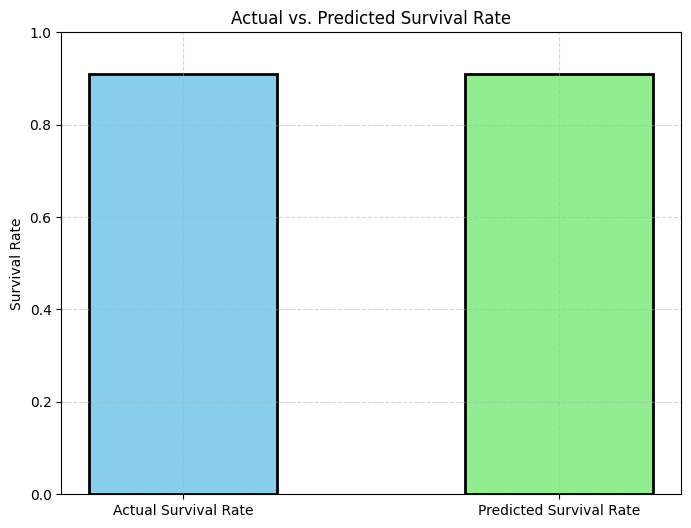

In [115]:
plt.figure(figsize=(8, 6))
bars = plt.bar(['Actual Survival Rate', 'Predicted Survival Rate'], [actual_survival_rate, predicted_survival_rate], color=['skyblue', 'lightgreen'], width=0.5, edgecolor='black')
plt.ylabel('Survival Rate')
plt.title('Actual vs. Predicted Survival Rate')
plt.ylim(0, 1)  # Set y-axis limits to 0 and 1

# Add grid lines with dashed linestyle and transparency
plt.grid(True, linestyle='--', alpha=0.5)

# Adjust bar properties
for bar in bars:
    bar.set_linewidth(2)  # Make bars thicker
    bar.set_height(bar.get_height() * 2.2)  # Make bars longer

plt.show()


 both L1 and L2 regularization methods are used to prevent overfitting in models by penalizing large coefficients. L1 regularization tends to produce sparse models with some coefficients being exactly zero, making it useful for feature selection, while L2 regularization produces smaller but non-zero coefficients for all features.